In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
np.random.seed(22)

T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_list = []
crit_95_list = []
crit_99_list = []
delta_list = []

In [2]:
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, 25)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, 25)) #constant
num_series = 25
B = 2000

multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=5) #constant

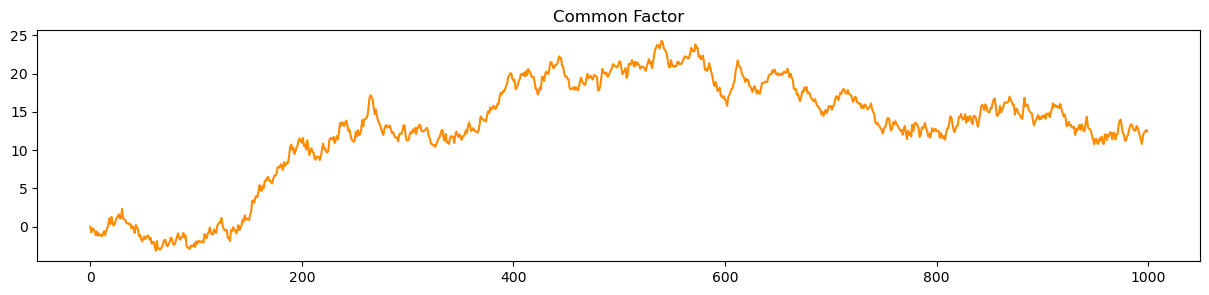

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

In [4]:
num_of_rw = 0.6
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()
coint_frac = 0.4
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

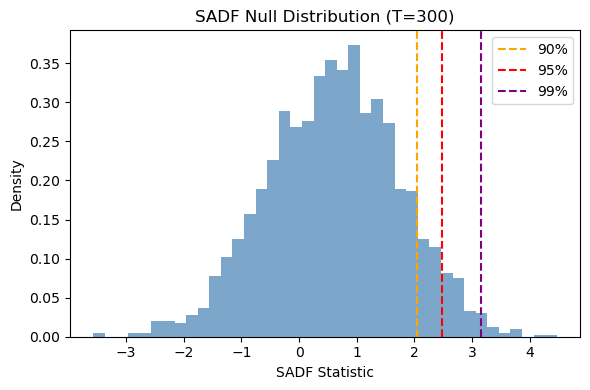

     Critical Value
90%        2.042183
95%        2.477802
99%        3.147401


In [5]:
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 =  np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 =  np.round(crit_val.loc["99%", "Critical Value"],3)

## Positive

In [7]:
innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


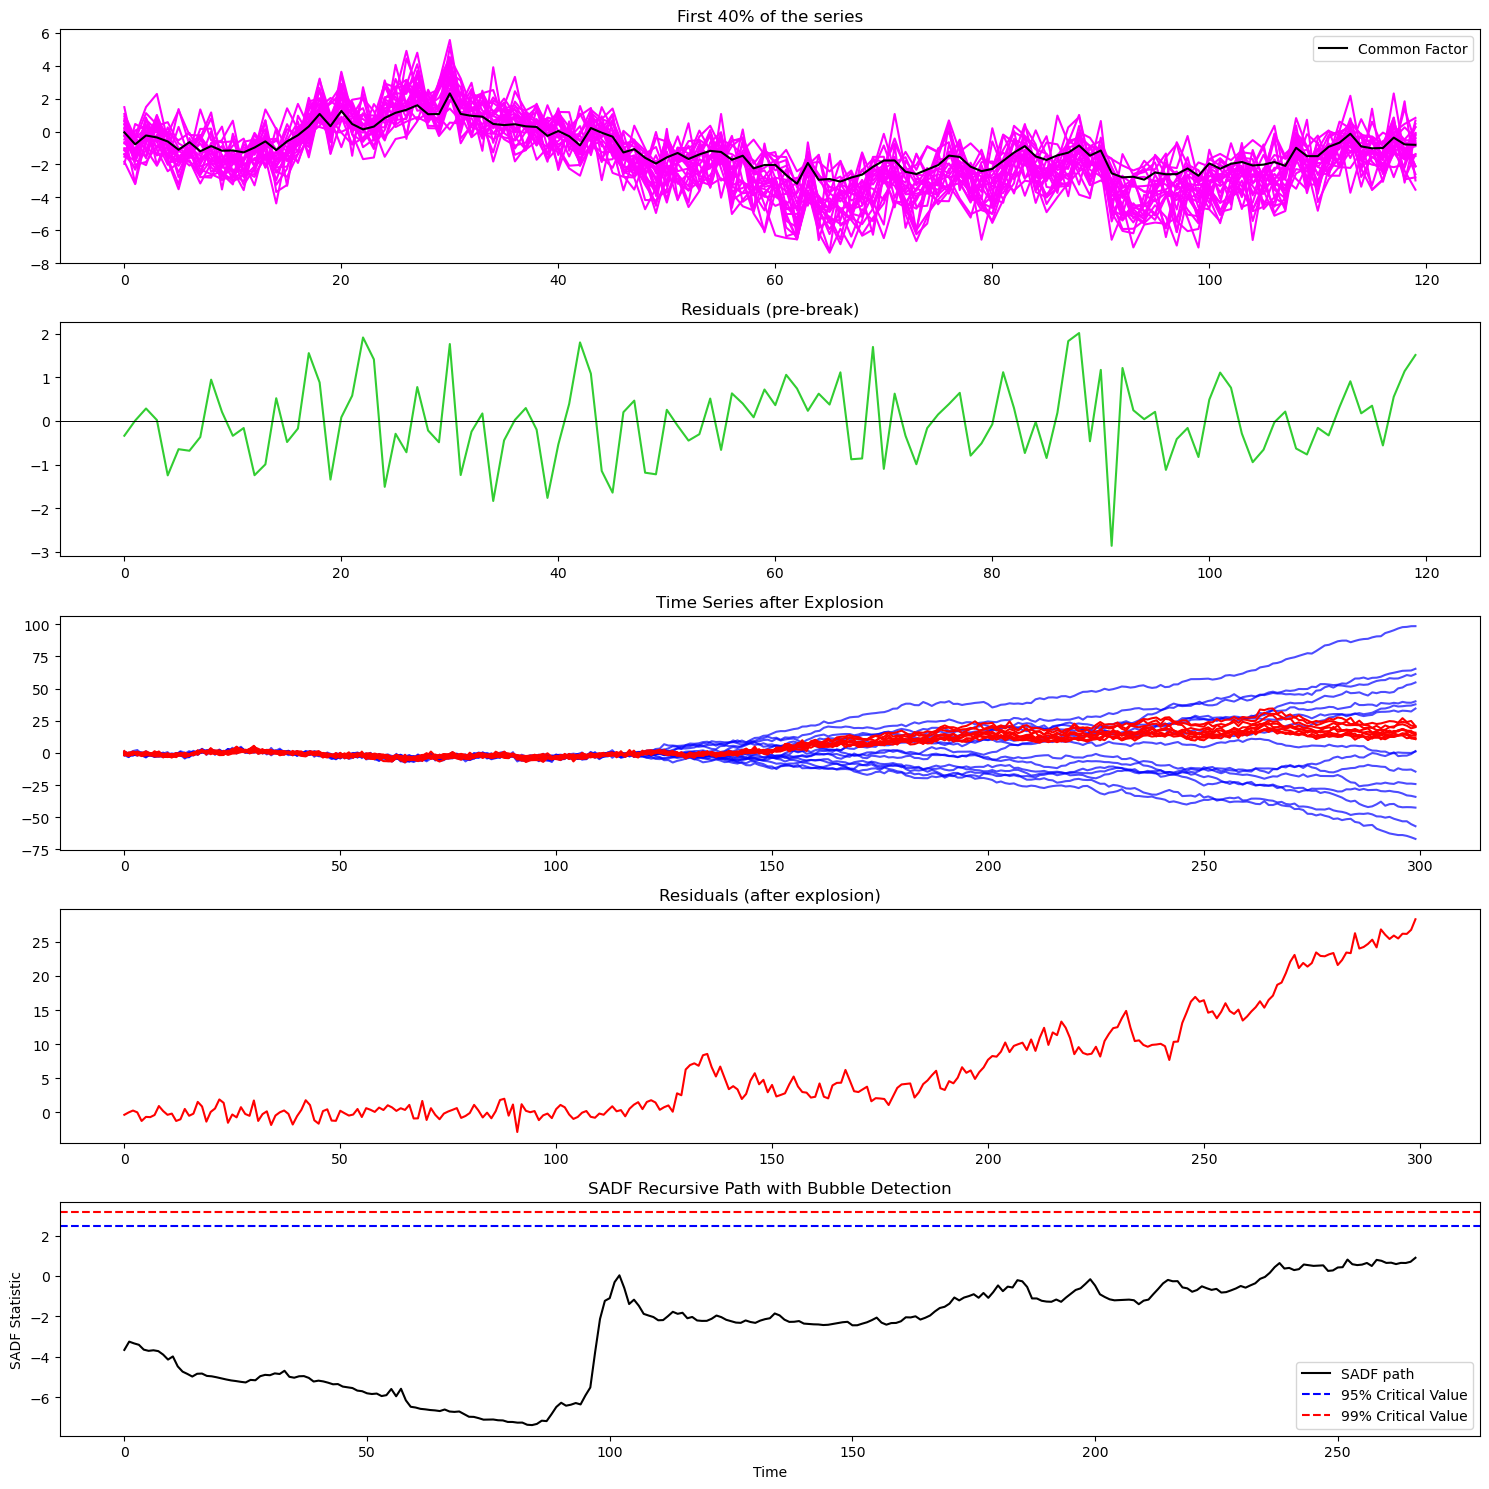

Time series is Non Explosive. SADF Value is: 0.9

Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [8]:
delta = 0.01
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


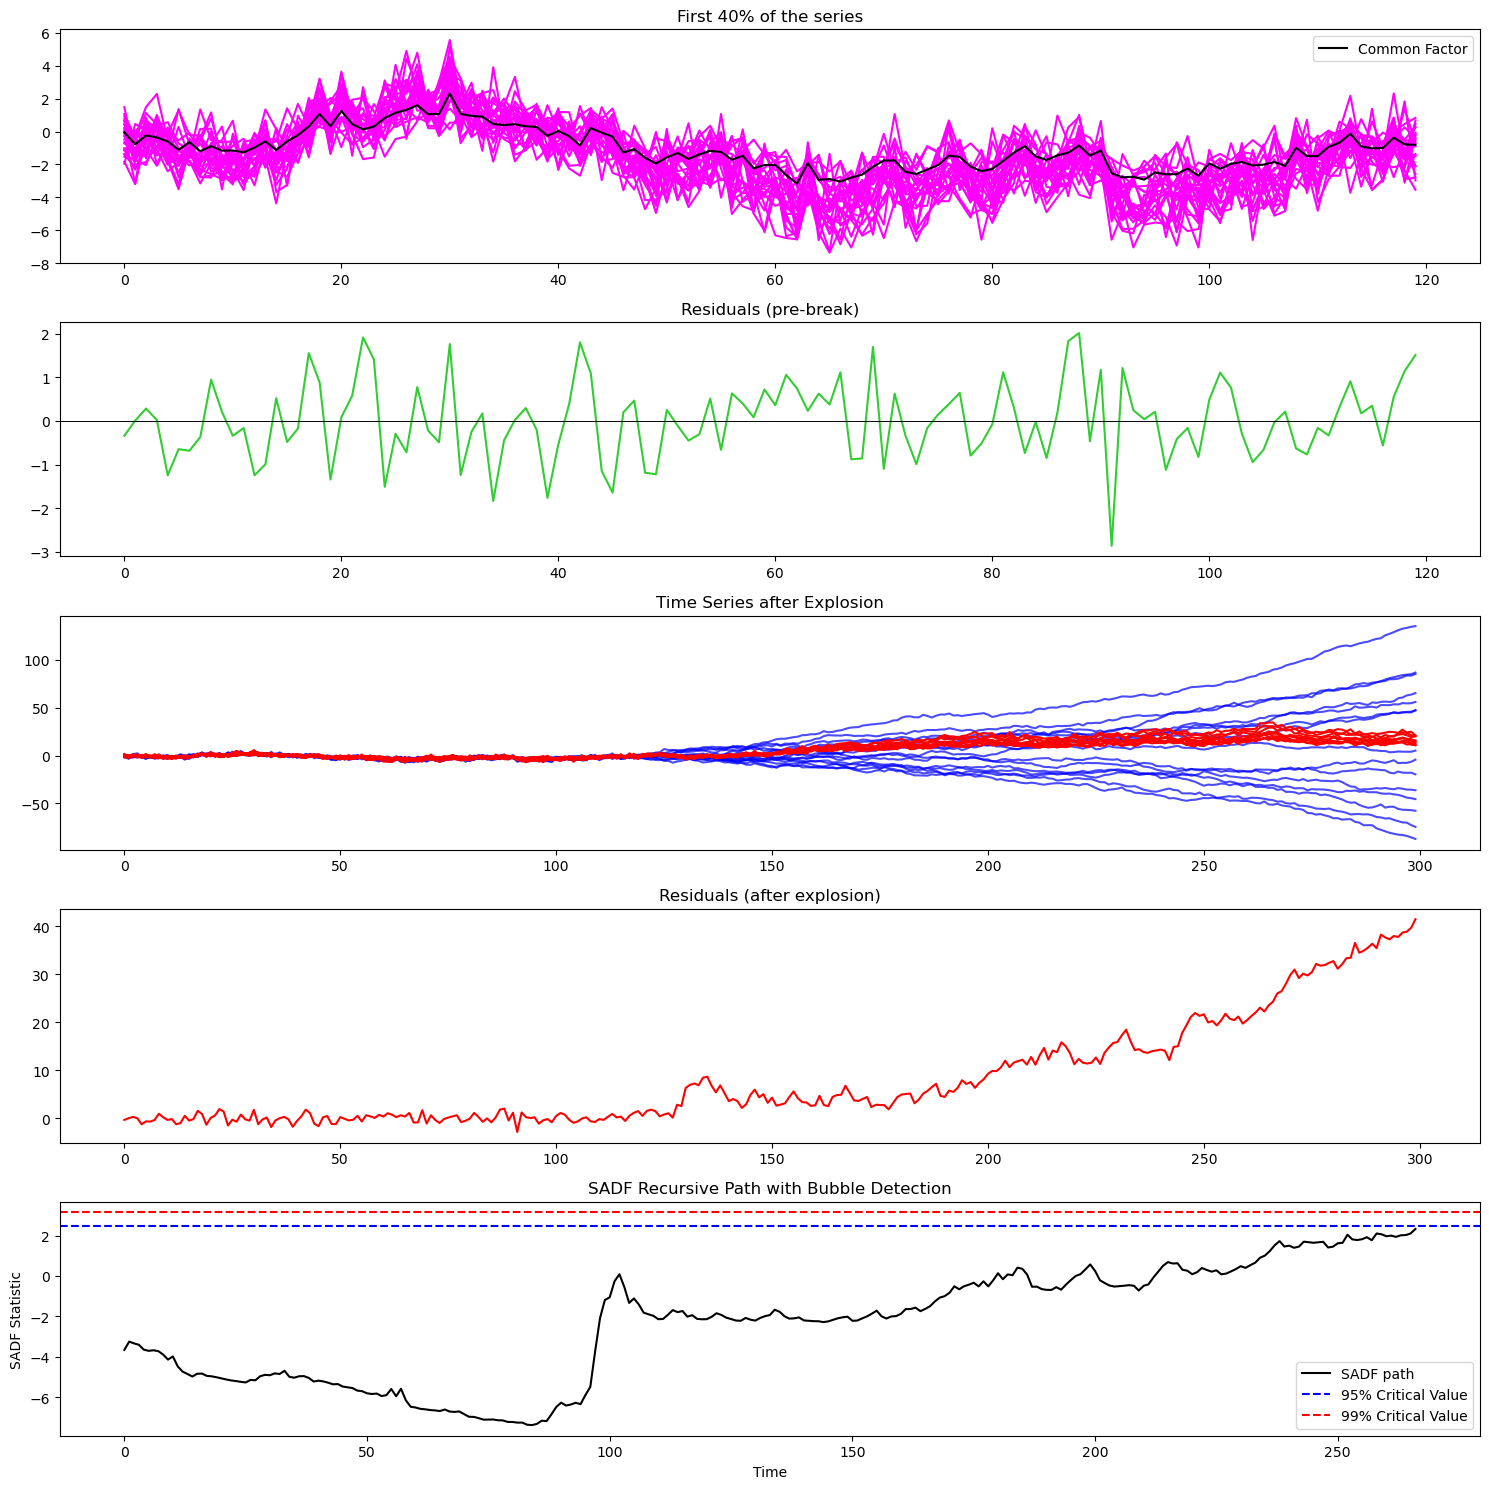

Time series is Non Explosive. SADF Value is: 2.32

Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [9]:
delta = 0.012
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


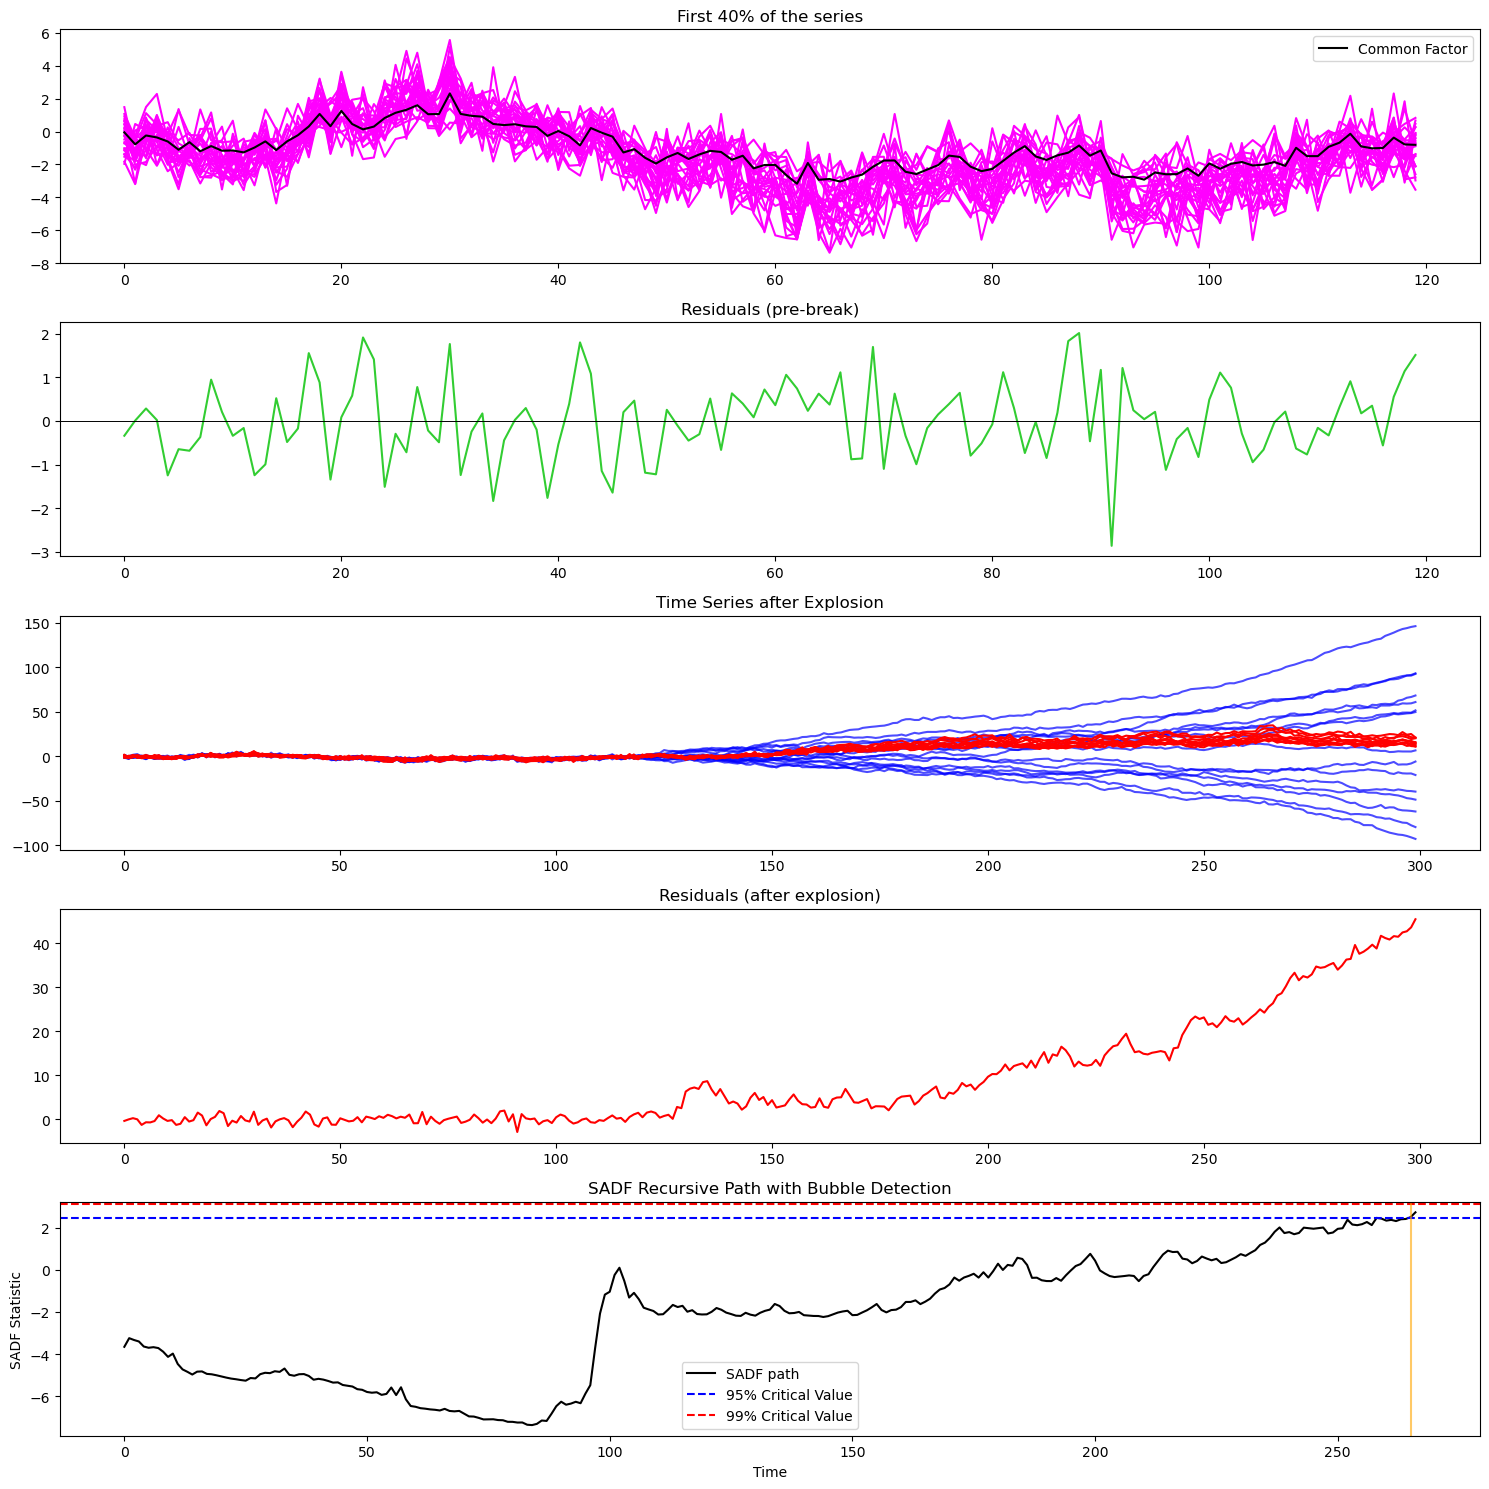

Time series is Explosive. SADF Value is: 2.73

Bubble starts at t=265
Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [10]:
delta = 0.0125
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


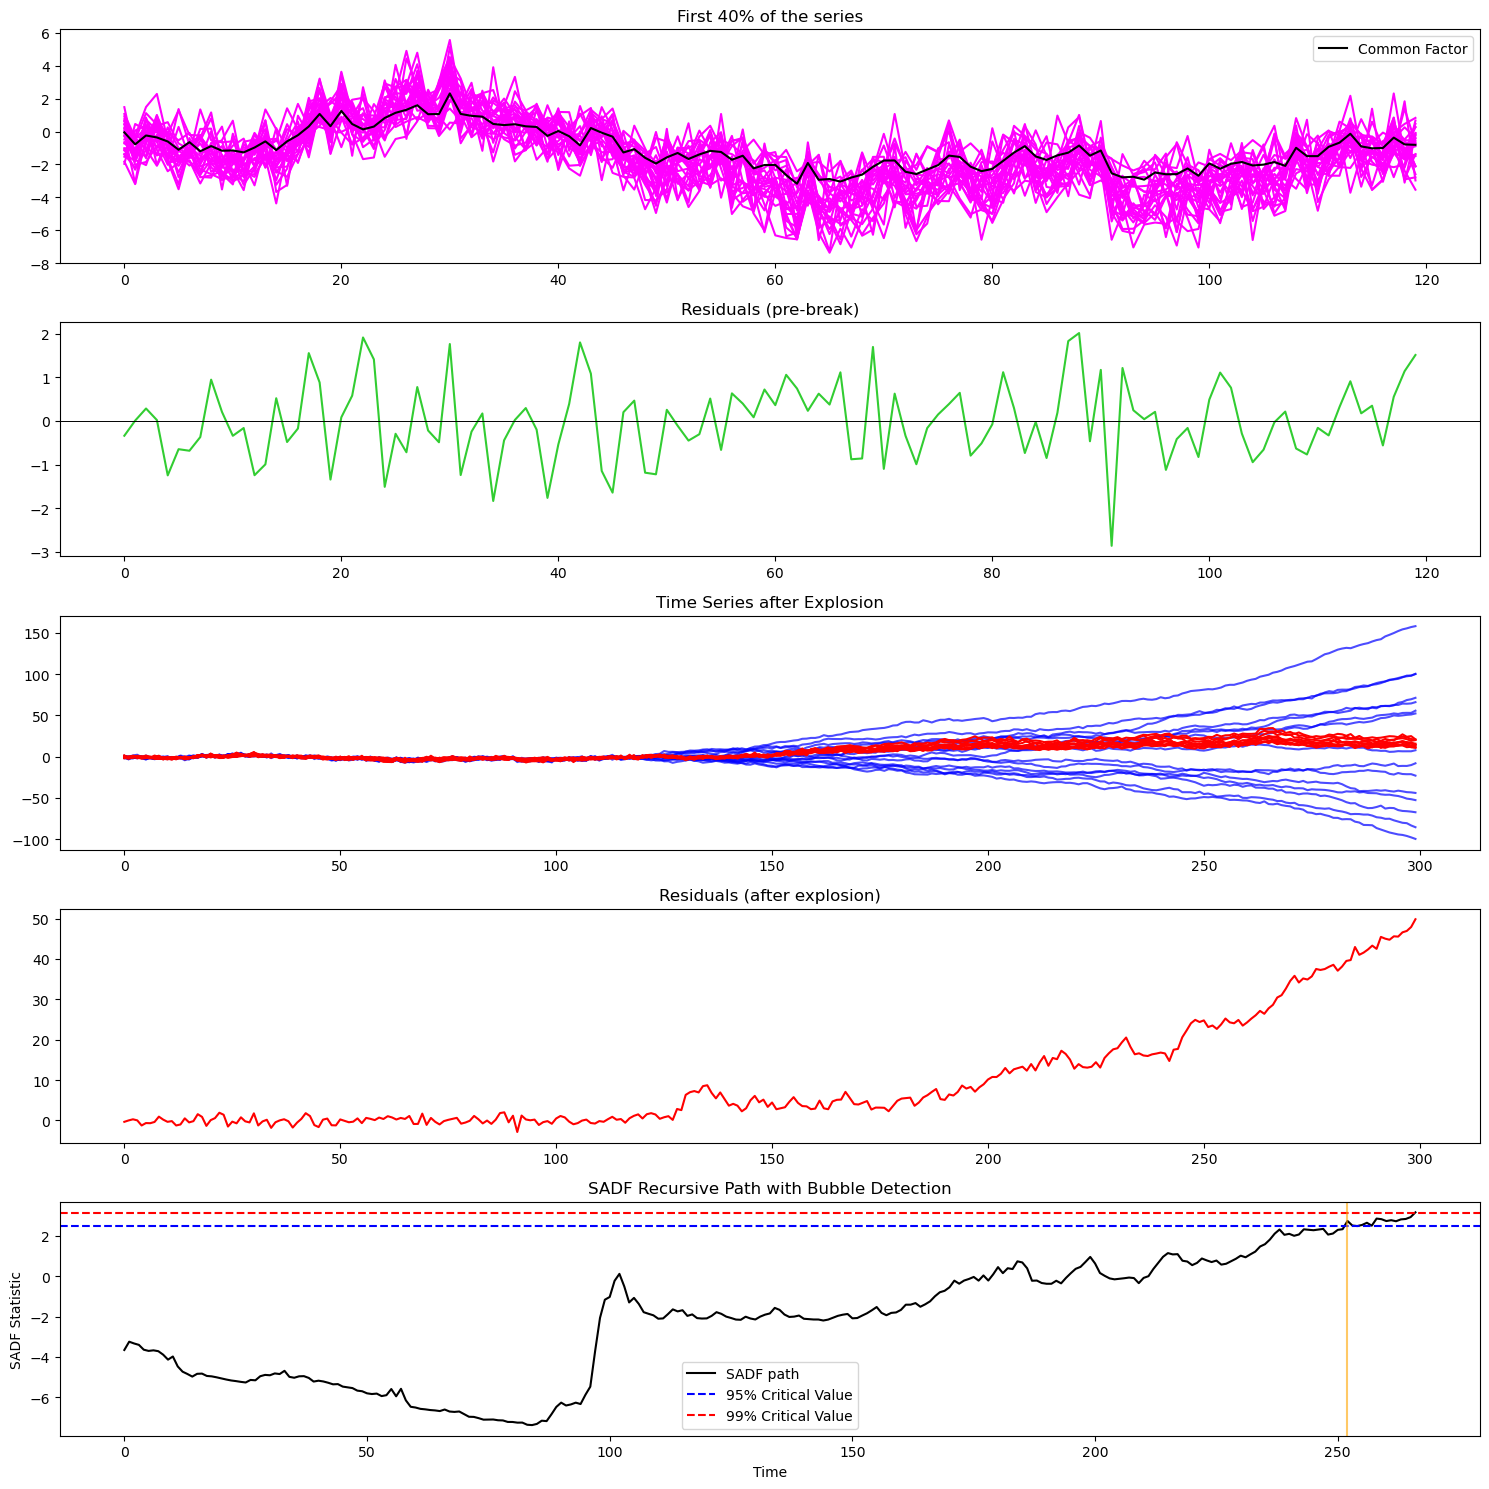

Time series is Explosive. SADF Value is: 3.16

Bubble starts at t=252
Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [11]:
delta = 0.013
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


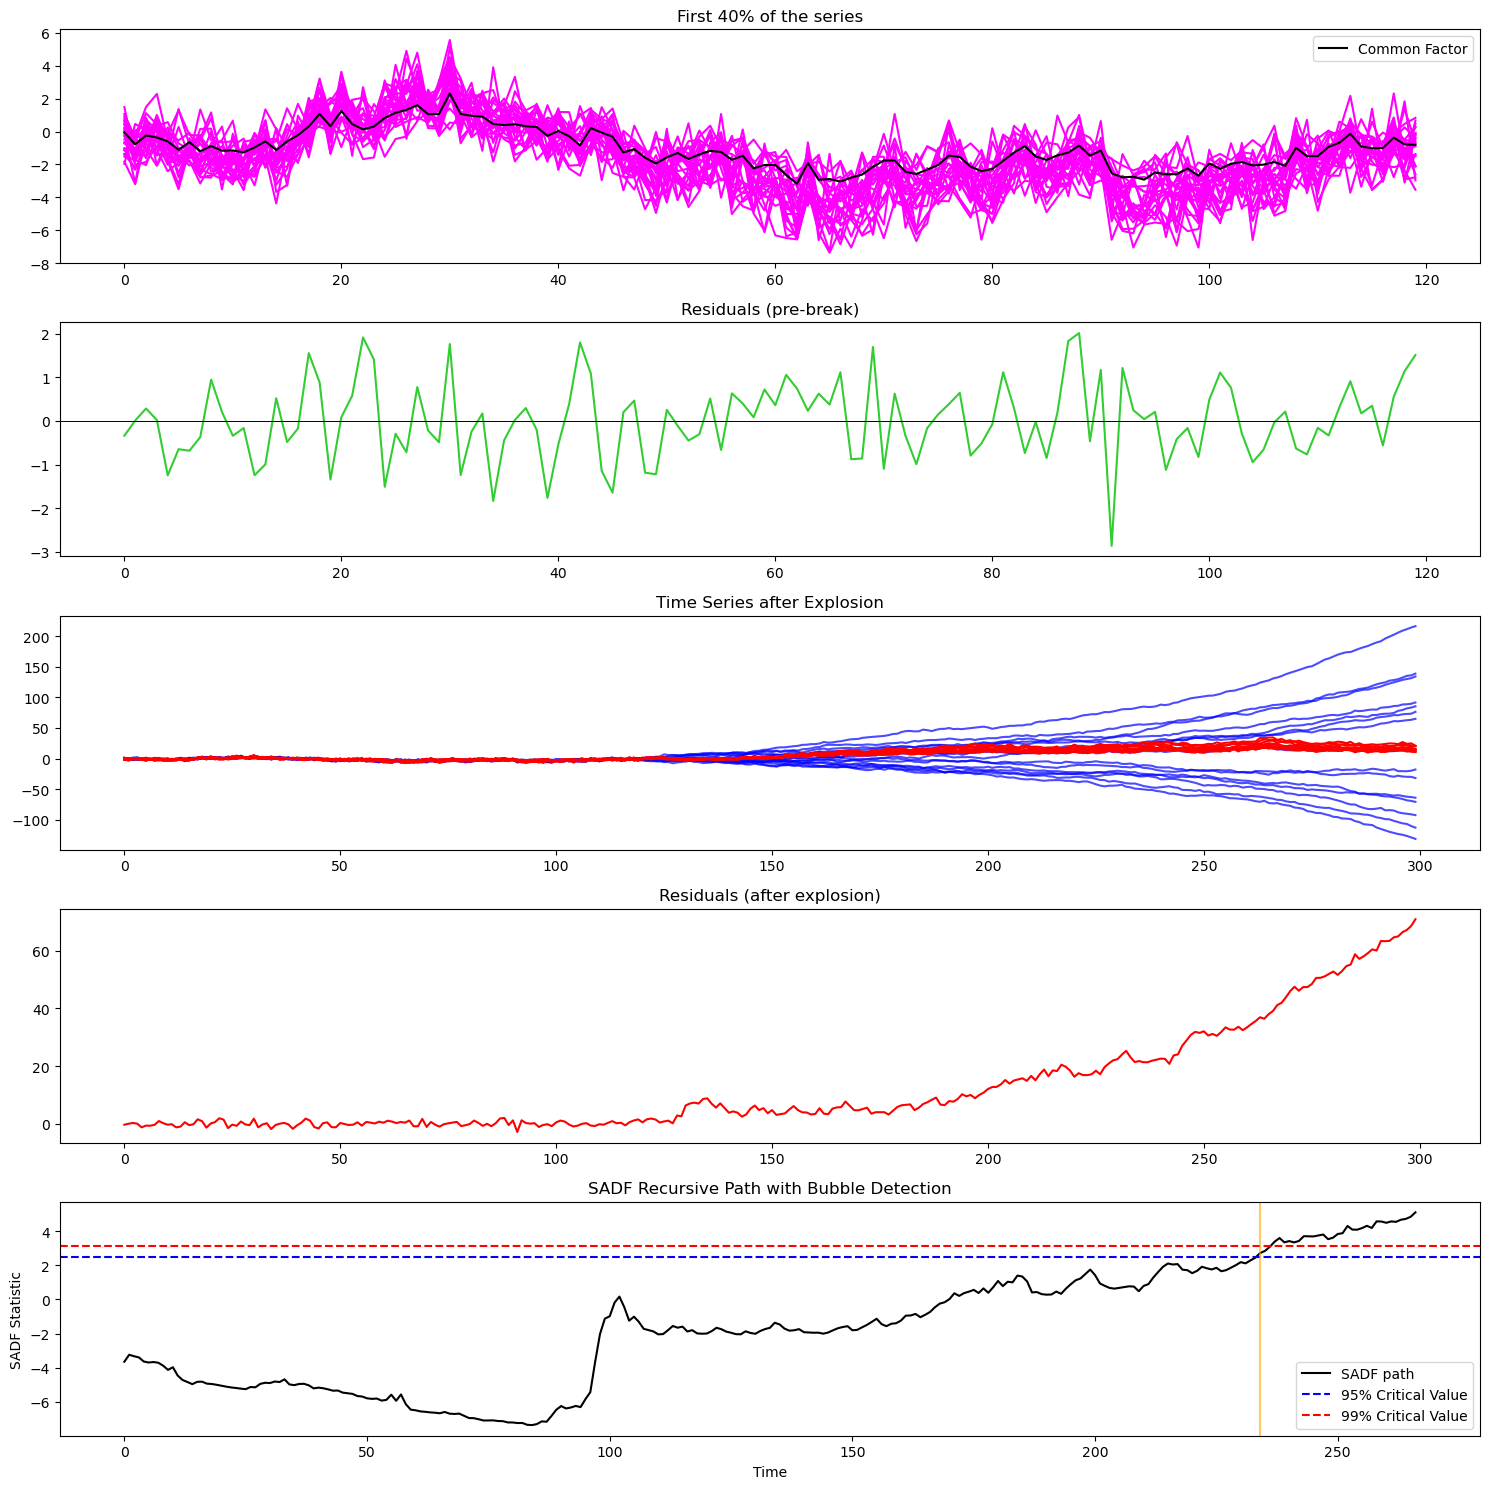

Time series is Explosive. SADF Value is: 5.11

Bubble starts at t=234
Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [12]:
delta = 0.015
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


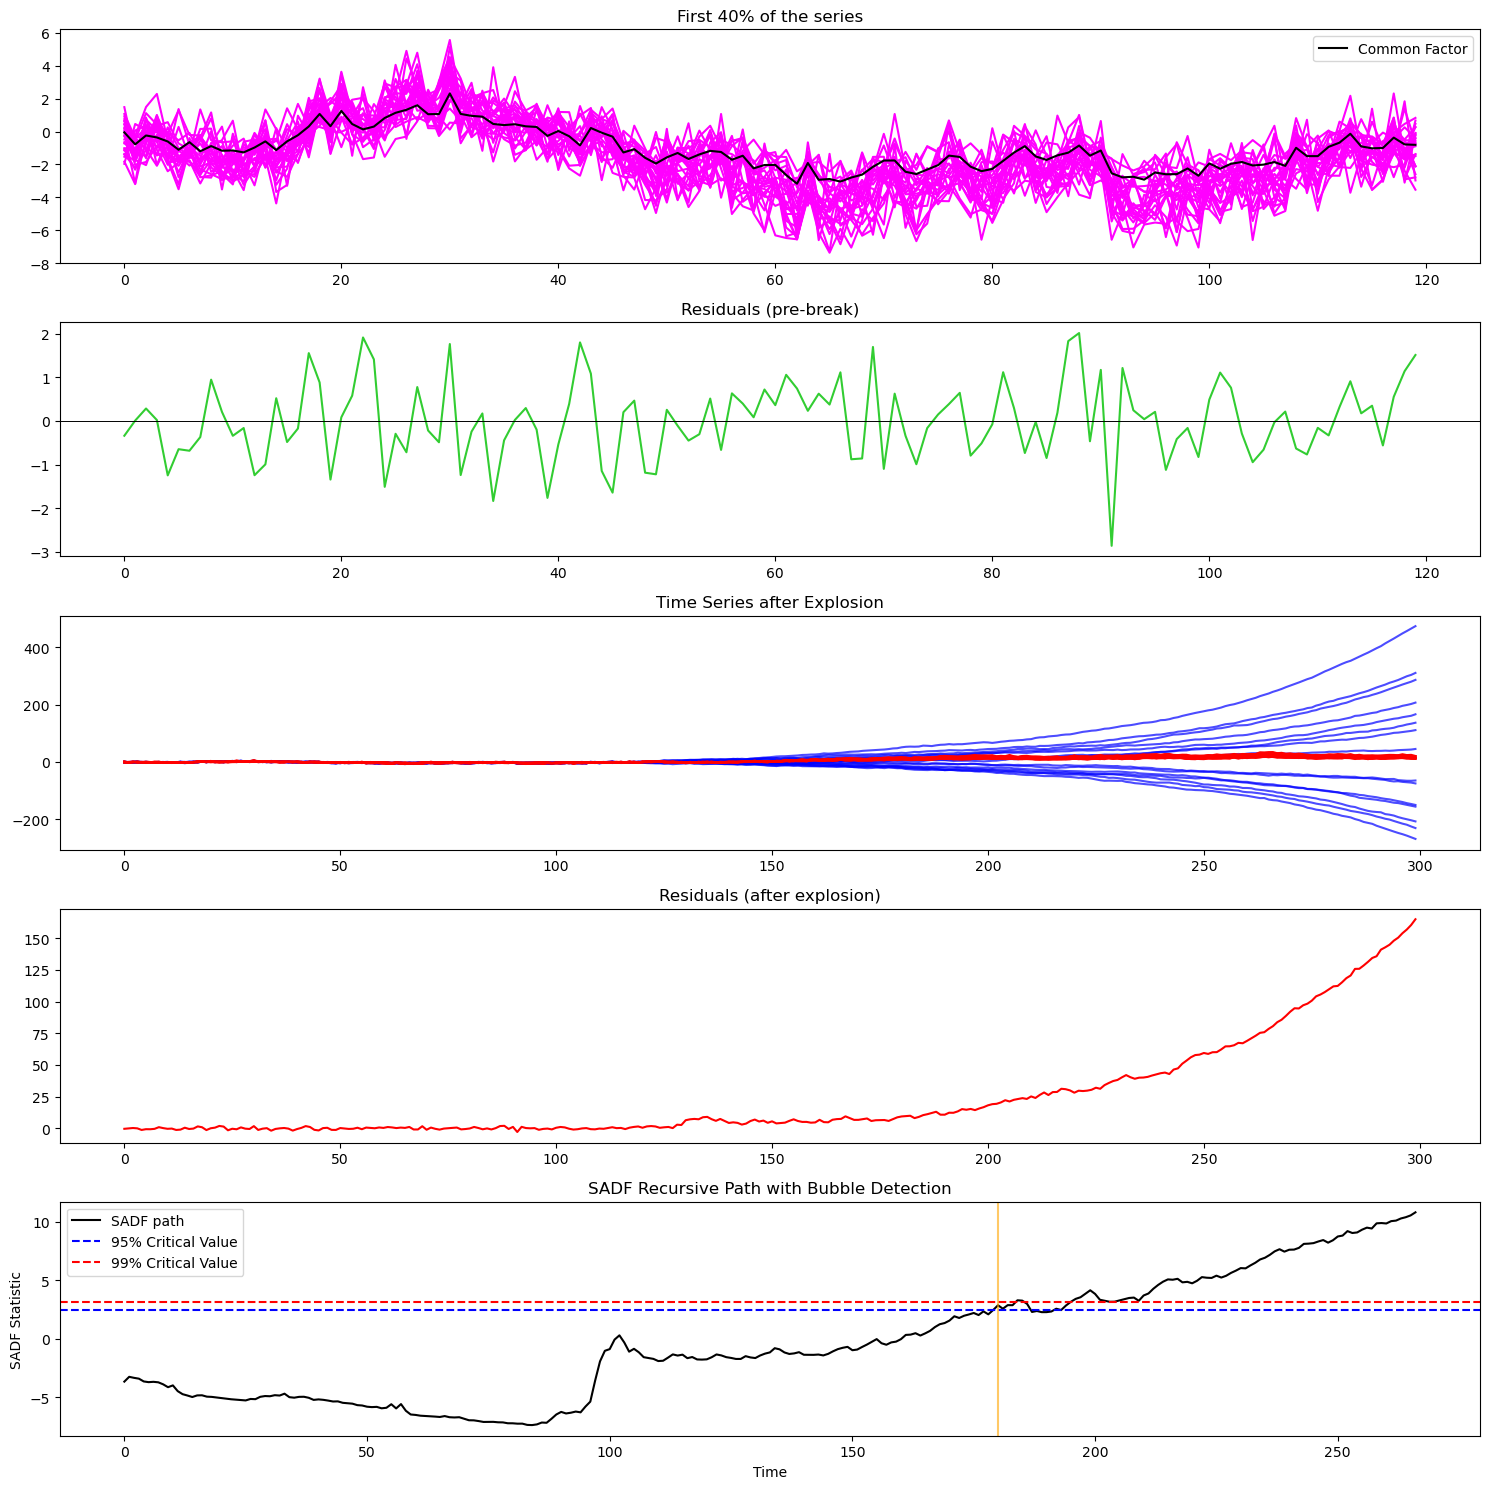

Time series is Explosive. SADF Value is: 10.82

Bubble starts at t=180
Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [13]:
delta = 0.02
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

## Negative

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


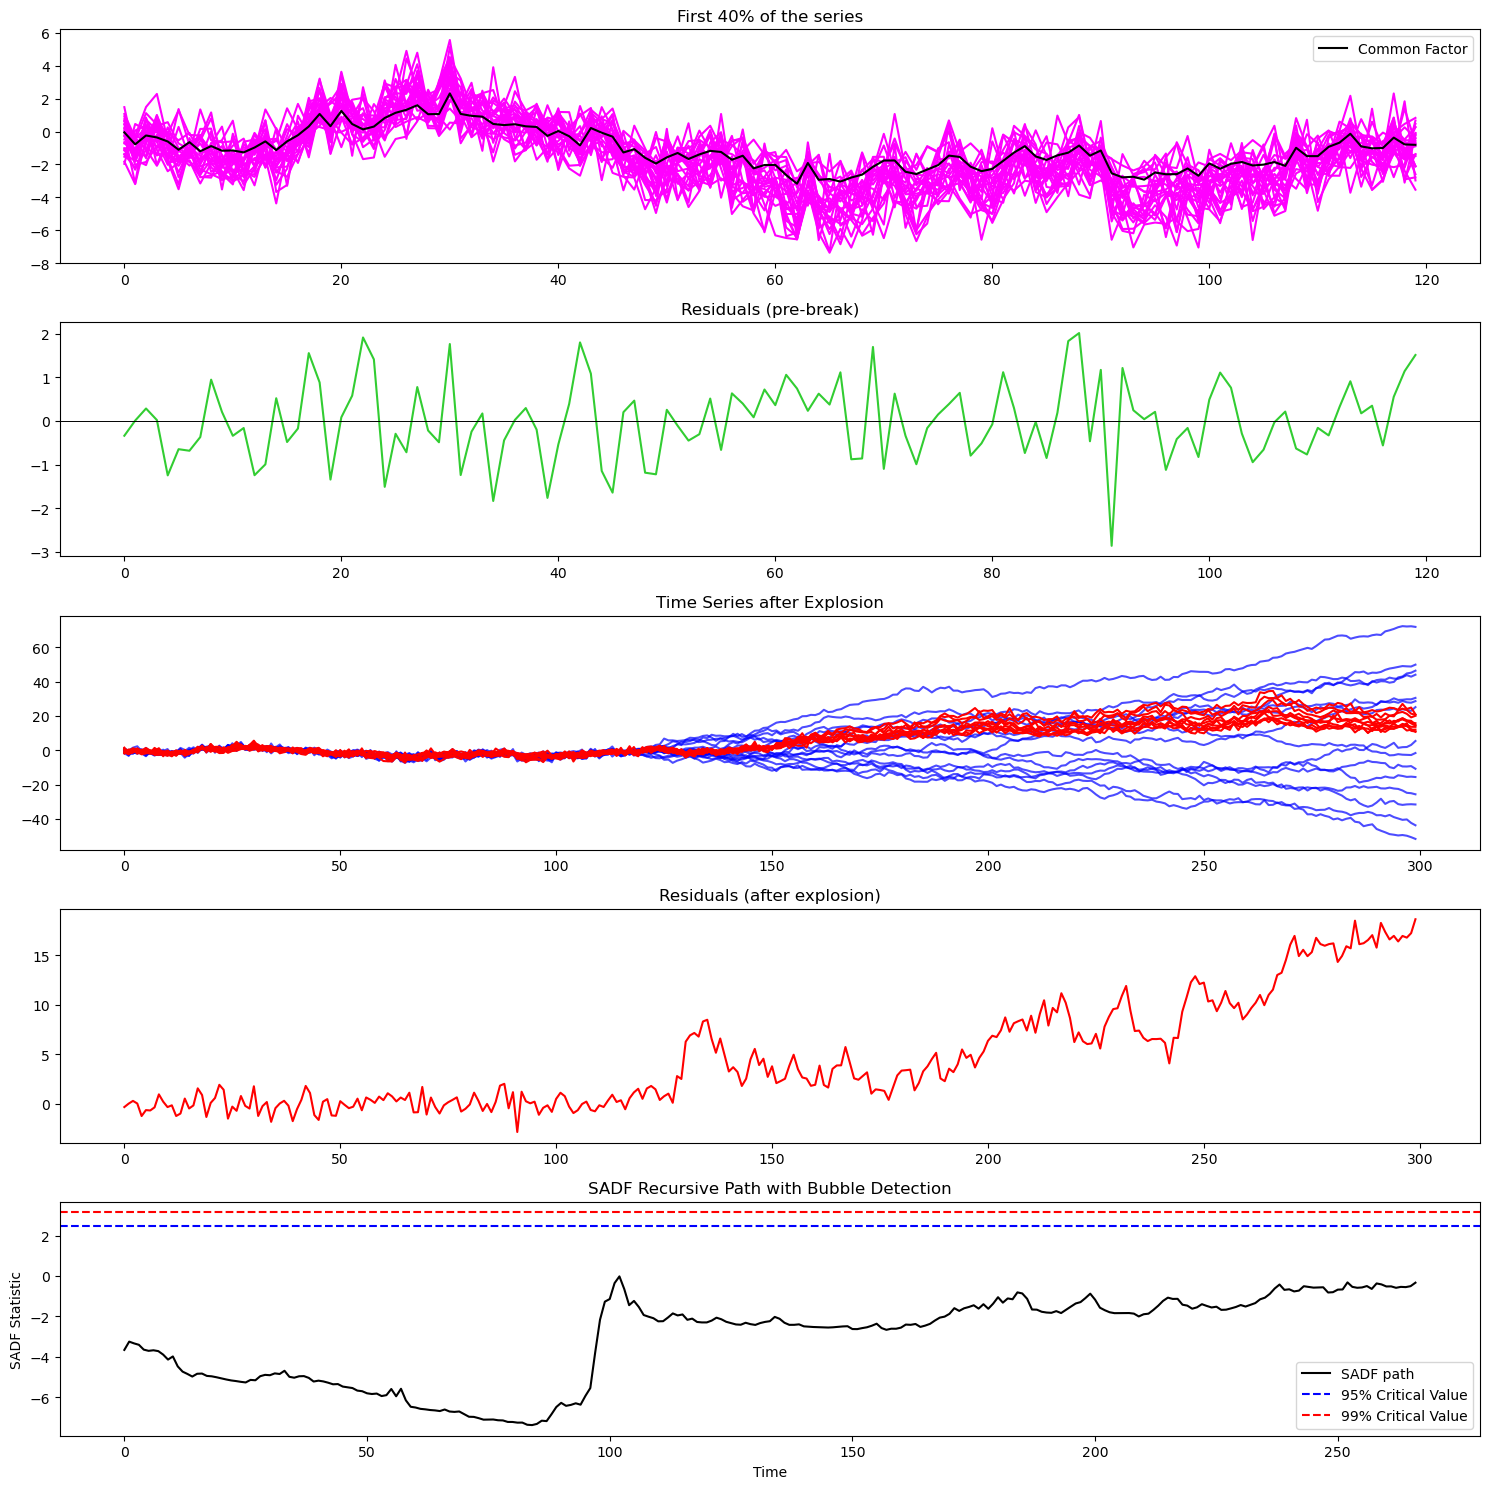

Time series is Non Explosive. SADF Value is: -0.02

Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [15]:
delta = 0.008
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


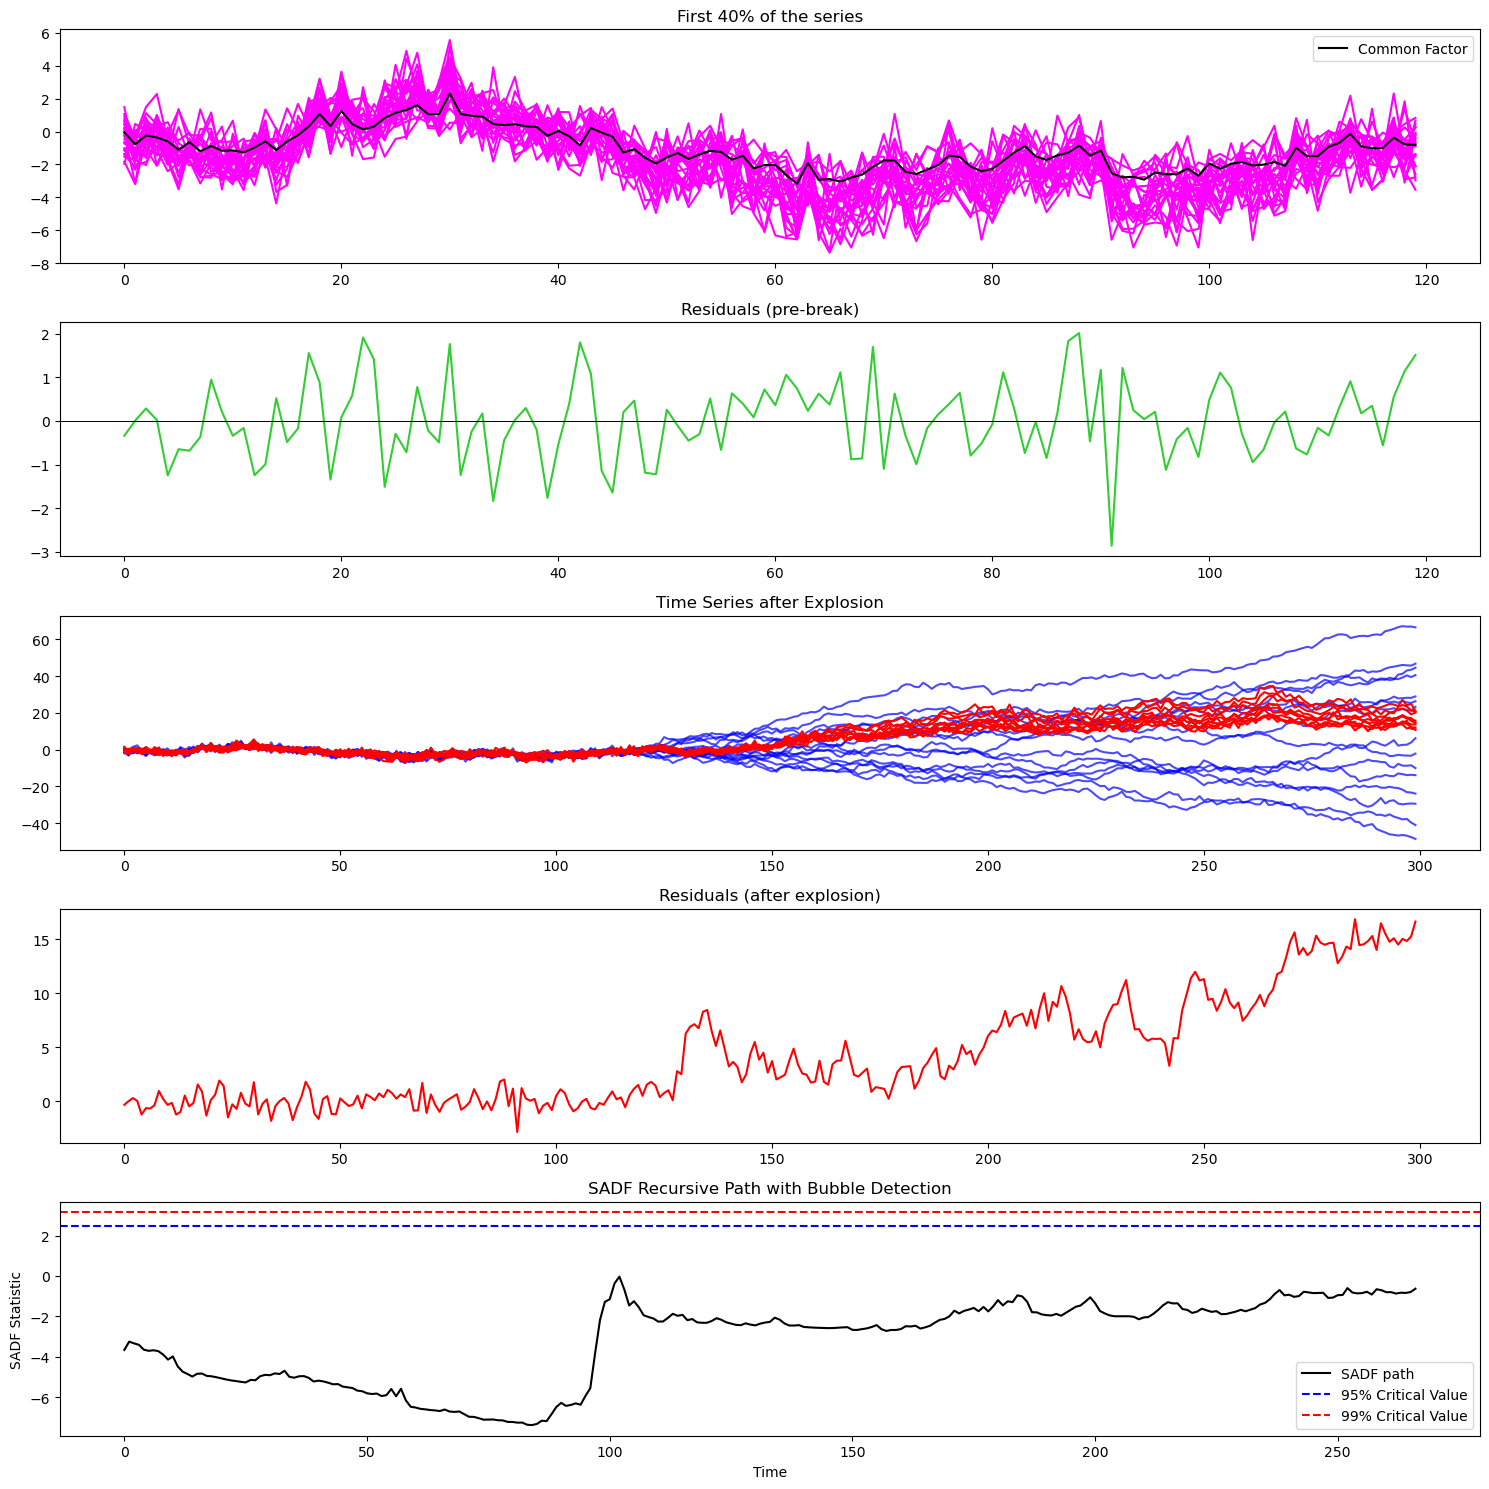

Time series is Non Explosive. SADF Value is: -0.03

Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [16]:
delta = 0.0075
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


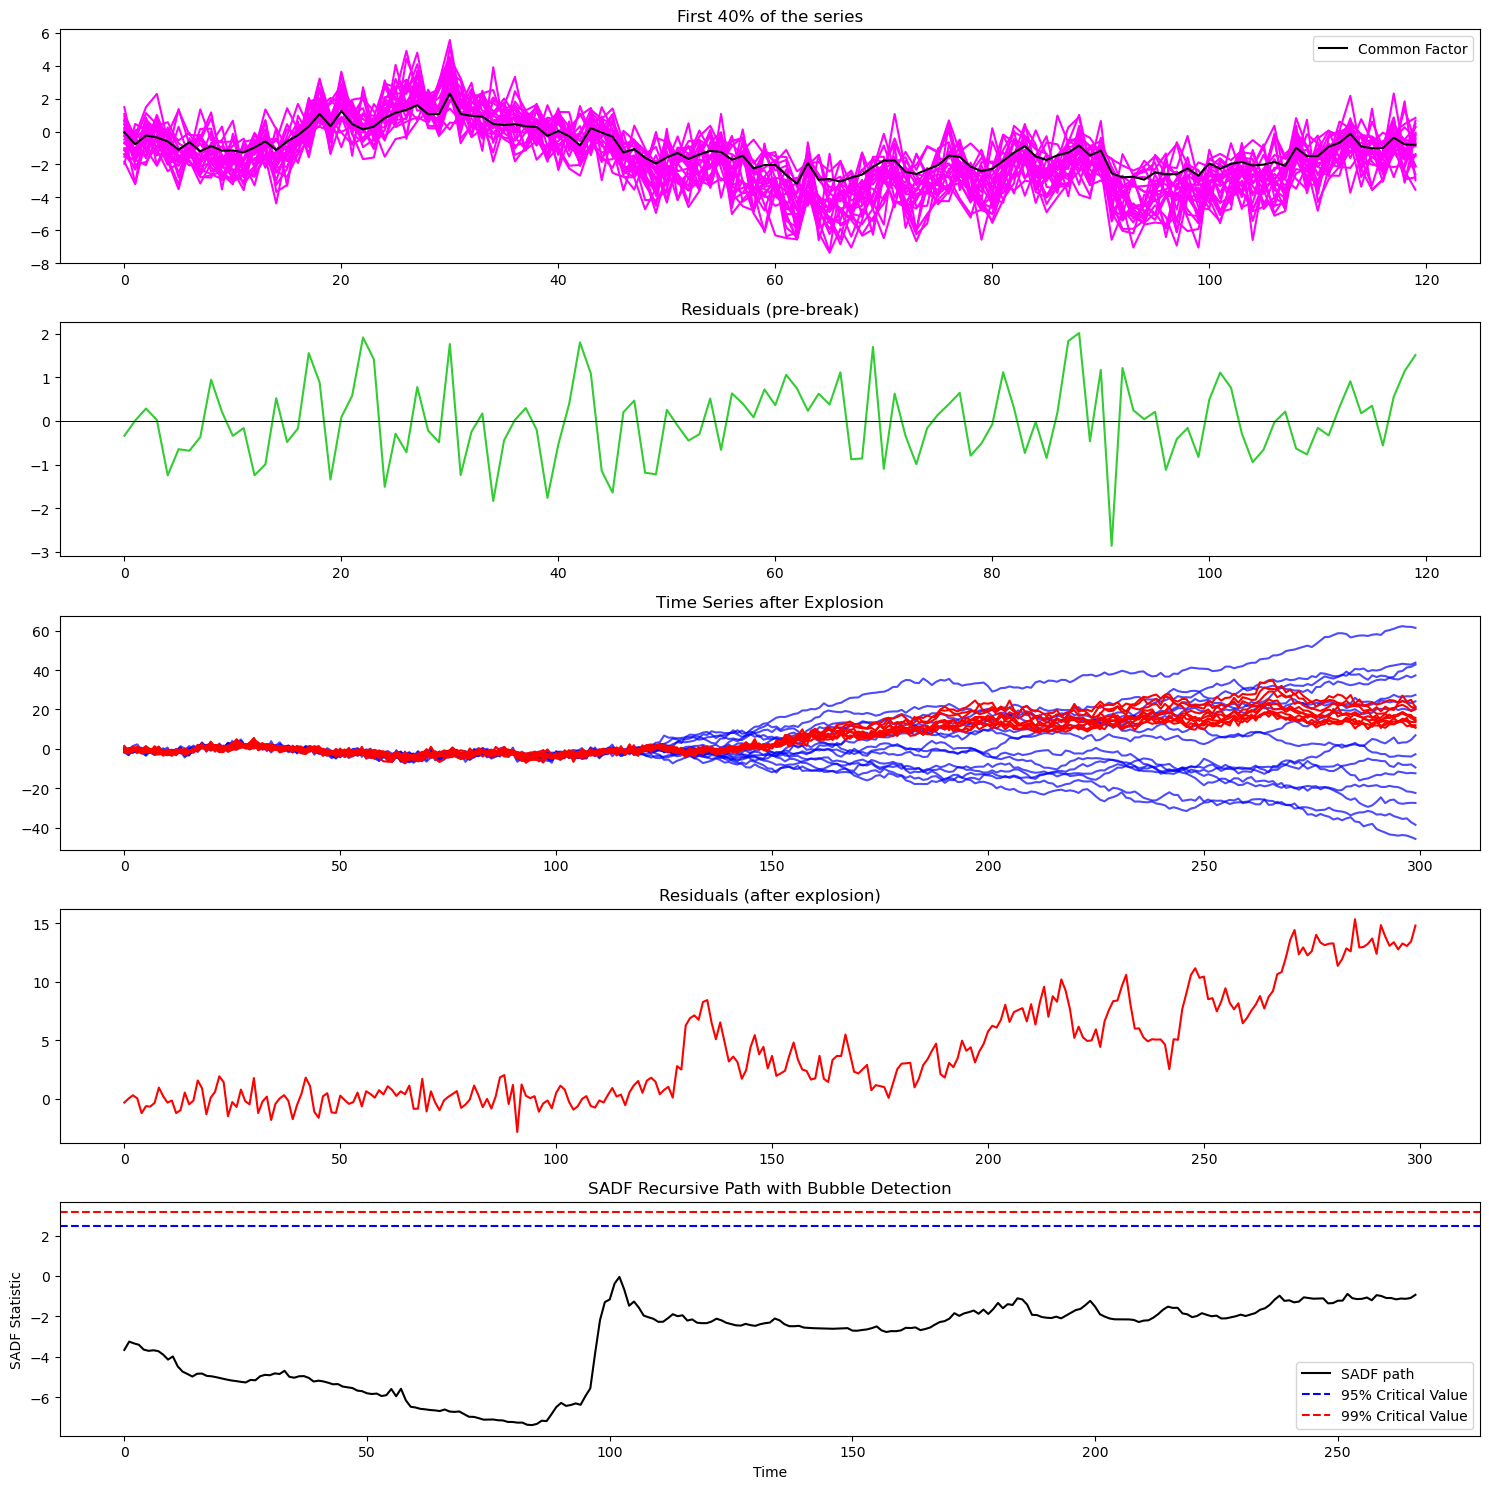

Time series is Non Explosive. SADF Value is: -0.05

Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [17]:
delta = 0.007
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


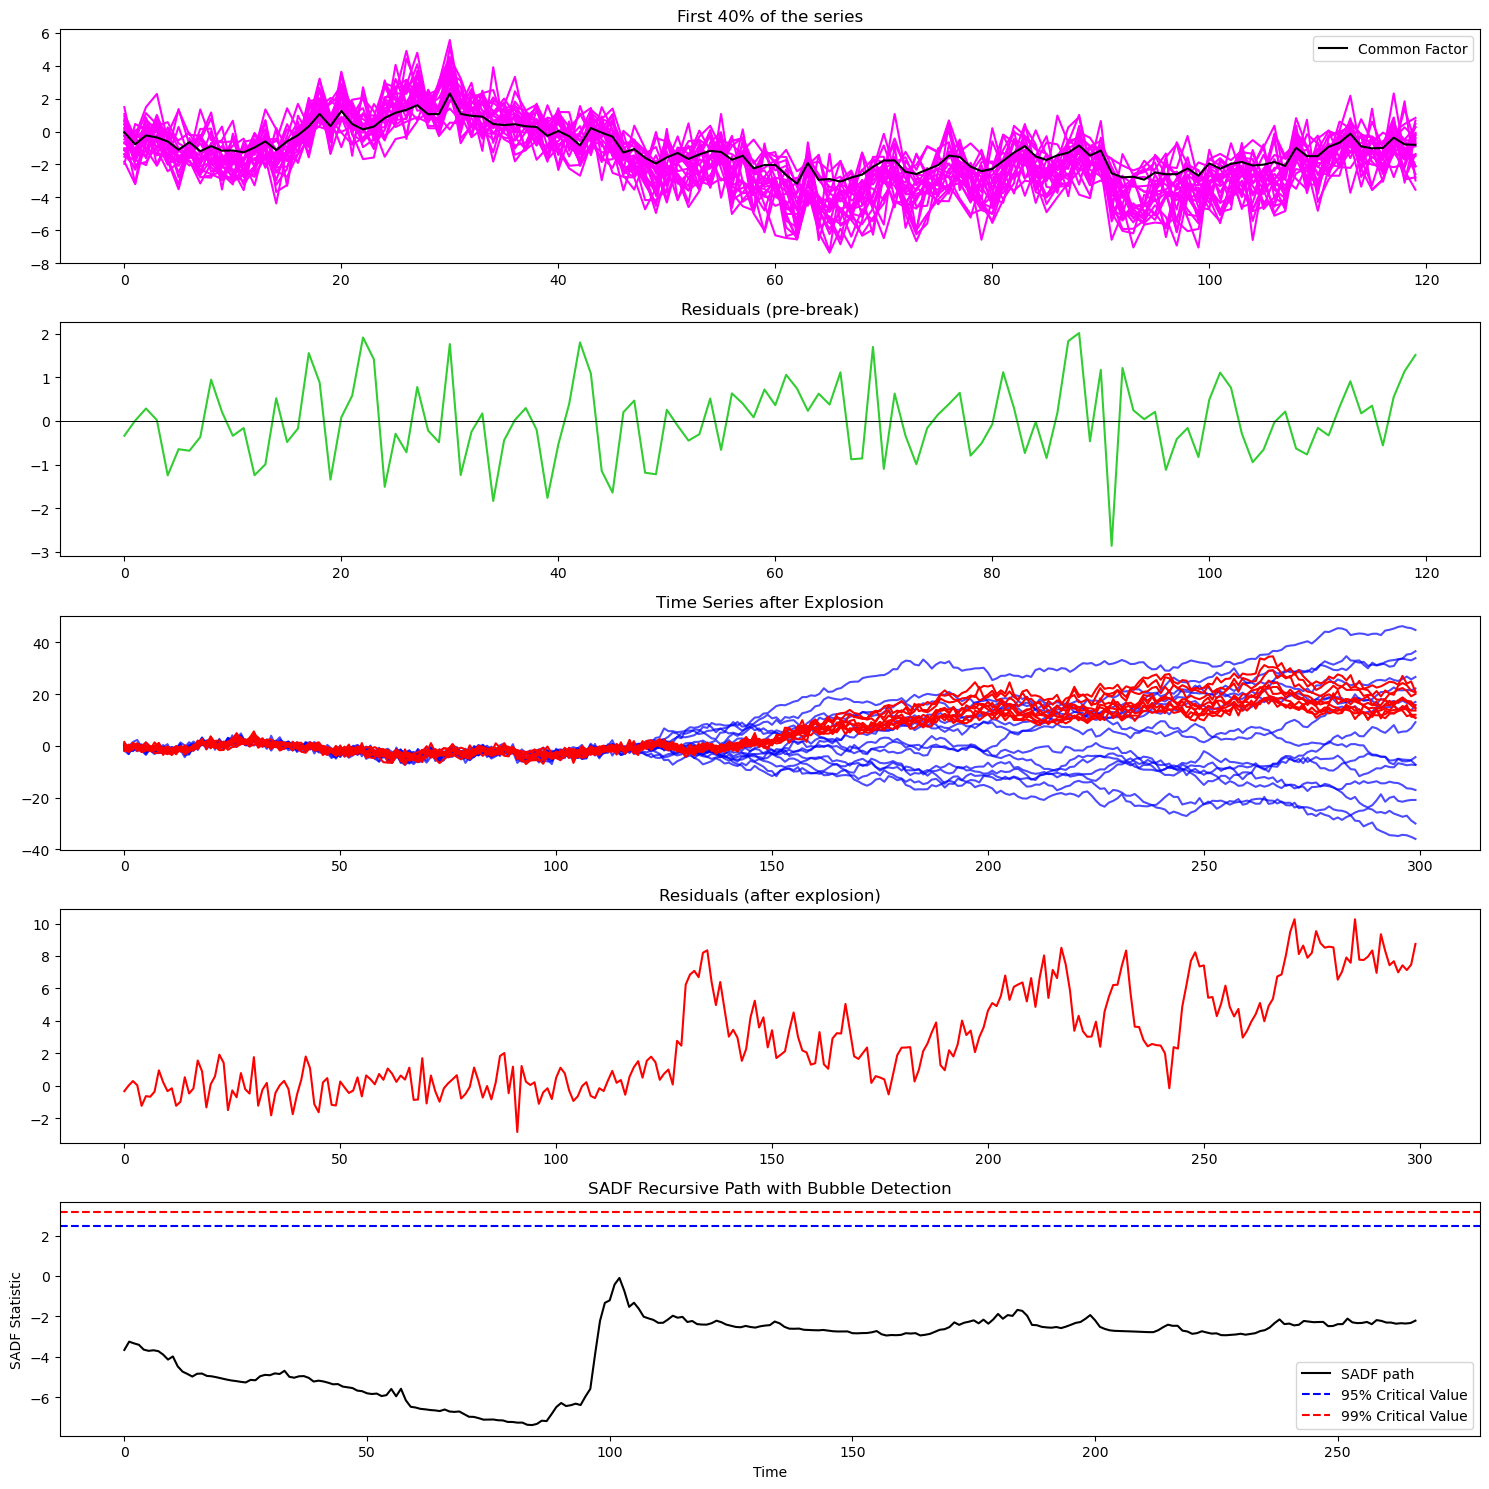

Time series is Non Explosive. SADF Value is: -0.1

Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [18]:
delta = 0.005
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

beta =  [ 0.04145492  0.02808078 -0.10254395  0.00237933  0.0317664   0.10155631
  0.15990306 -0.08329083  0.09193693  0.05452451  0.00187252 -0.11947643
 -0.03784233  0.01772994 -0.06505509  0.02705461  0.14233368 -0.08274554
  0.01037325  0.07920855  0.03290817 -0.02168941  0.16149446  0.10568824]
alpha =  -0.0367
ADF on residuals  stat = -4.382


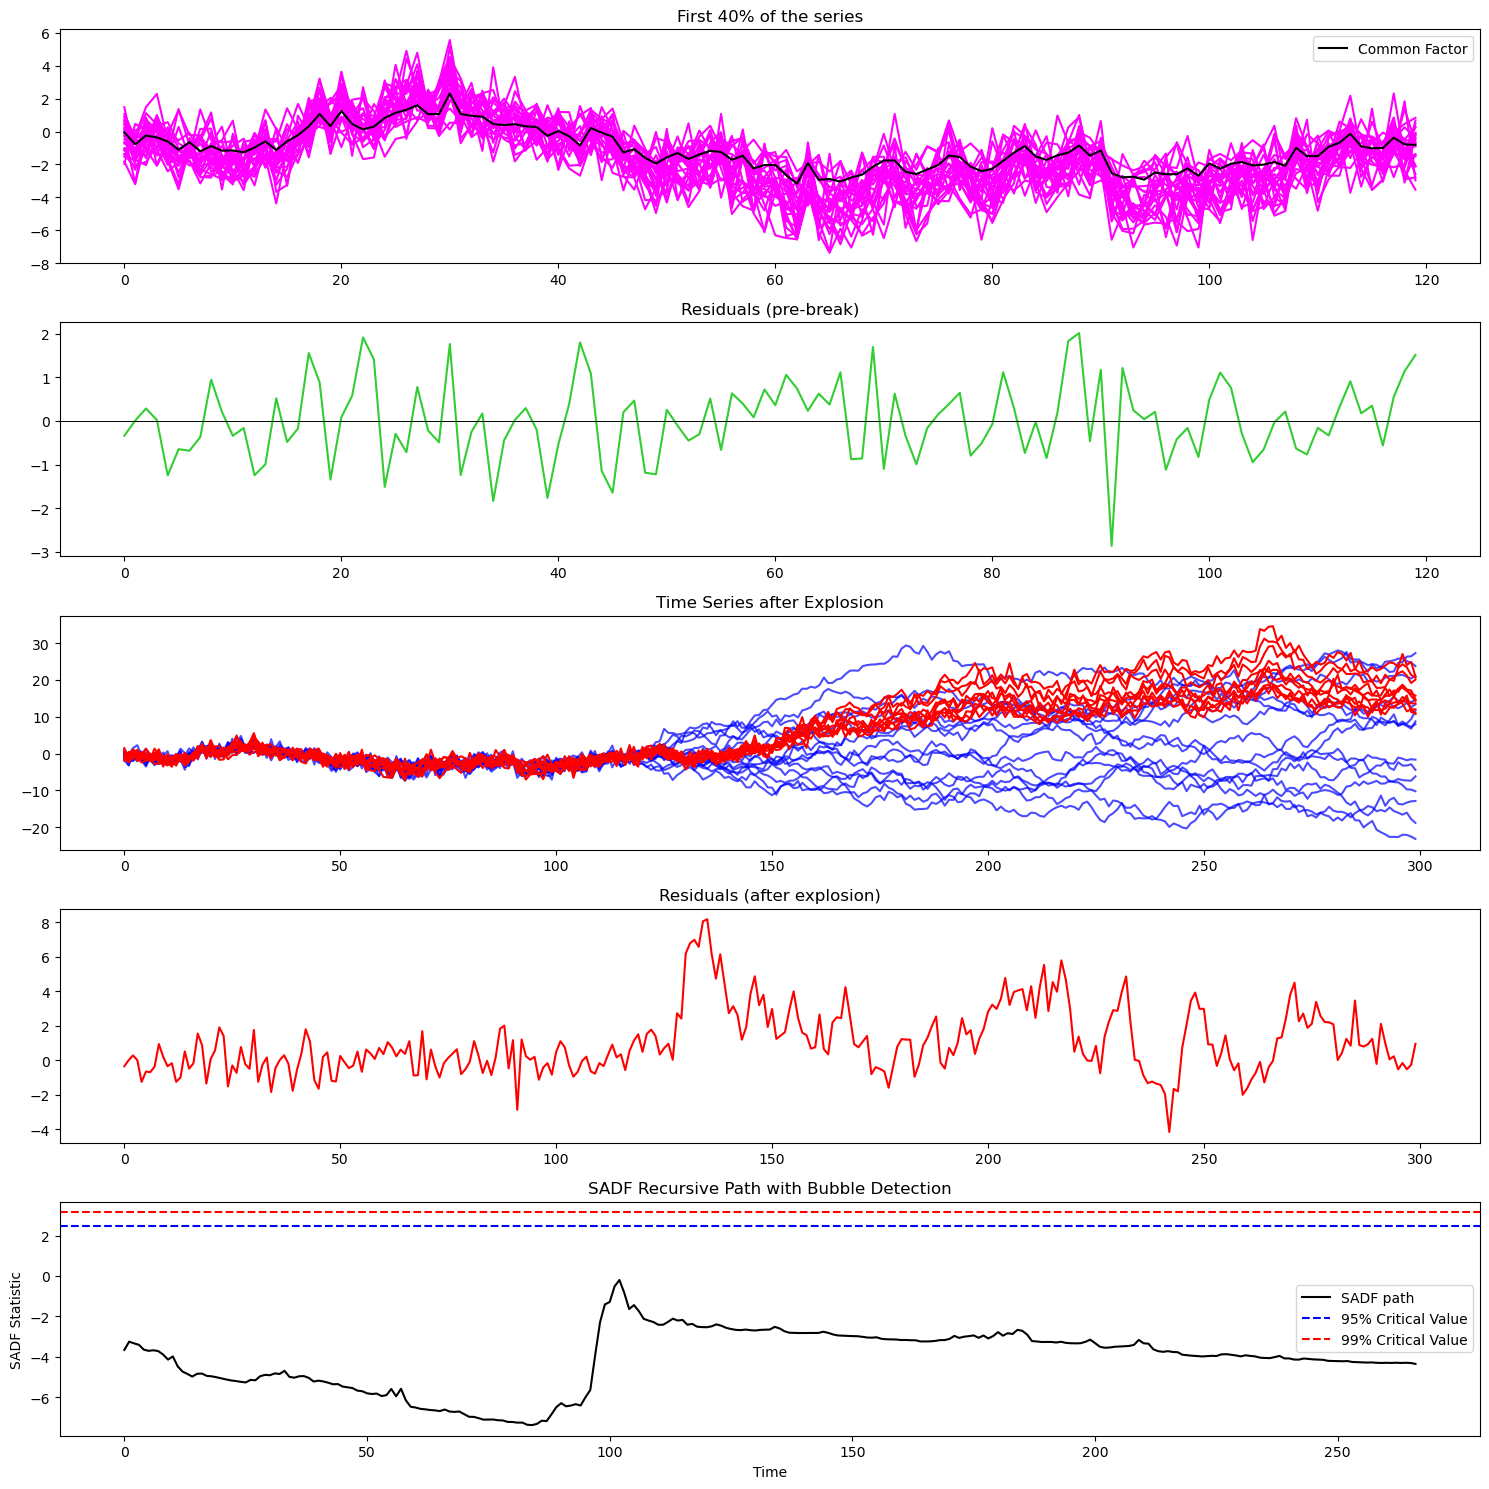

Time series is Non Explosive. SADF Value is: -0.2

Multipliers: [1.06633 1.12672 1.41607 1.67134 1.57491 1.0979  1.1968  1.94468 1.24534
 1.61839 1.69418 1.80107 1.88751 1.18913 1.82221 1.17114 1.80648 1.42346
 1.32384 1.34203 1.05612 1.04613 1.05473 1.6797  1.99396]


In [19]:
delta = 0.001
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)

In [20]:
pd.DataFrame({
    'T': T_list,
    'num_series': num_series_list,
    'coint_frac': coint_frac_list,
    'num_of_rw': num_of_rw_list,
    'SADF': SADF_list,
    'crit_95': crit_95_list,
    'crit_99': crit_99_list,
    'delta':delta_list
}).to_csv(str(num_series) + "_Series_Experiment_Delta_testing_300.csv", index=False)

import sounddevice as sd
fs = 30100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)
